In [1]:
from astropy.table import Table
import numpy as np
import pylab as plt
from astropy.table import vstack
from scipy.interpolate import UnivariateSpline
import pynbody as pb
from matplotlib.colors import LogNorm as LN

In [2]:
def alphaCutOff(feh):
    slope = (-0.5-0.05)/(0.5+0.45)
    ofe = slope*(feh-0.5)-0.5
    return ofe

In [4]:
txy = Table.read('733DiffFB20T1c02.fits',1)
txy.add_column(Table.Column(np.zeros(len(txy))+2),name='ID')
for i in range(0,len(txy)):
    if txy['CLUMPID'][i]==1:
        txy['ID'][i] = 1
stars = Table.read('733DiffFB20T1c02.fits',2)
merges = Table.read('733DiffFB20T1c02.fits',3)
merges.reverse()
txyz = pb.load('/media/bethanygarver/Backup Plus/Simulations/run733DiffFB20T1.0.%05d'%1000)
for merge in merges:
    for i in txy:
        if i['CLUMPID']==merge['CLUMP1']:
            id1 = i['ID']
            break
    for i in range(0,len(txy)):
        if txy['CLUMPID'][i]==merge['CLUMP2']:
            txy['ID'][i] = id1+1
        elif txy['ID'][i]>id1:
            txy['ID'][i] = txy['ID'][i]+1
idmax = np.max(txy['ID'])
for i in range(0,len(txy)):
    if txy['ID'][i]==idmax:
        txy['ID'][i] = txy['ID'][i]+txy['CLUMPID'][i]
idlist = np.unique(np.array(txy['ID']))
for i in range(0,len(idlist)):
    for j in range(0,len(txy)):
        if txy['ID'][j]==idlist[i]:
            txy['ID'][j] = i+1
idlist = np.unique(np.array(txy['ID']))
for i in range(0,len(merges)):
    for j in range(2,len(merges[i])):
        if merges[i][j]!=0:
            inclump = txy[(txy['CLUMPID']==merges[i][j])]
            merges[i][j] = inclump['ID'][0]

for i in range(len(stars['INDEX'])):
    stars['INDEX'][i] = int(stars['INDEX'][i])
            
# txy.add_column(Table.Column(np.zeros(len(txy))),name='Z')
# txy.add_column(Table.Column(np.zeros(len(txy))),name='MASS')
# txy.add_column(Table.Column(np.zeros(len(txy))),name='MEANFEH')
# txy.add_column(Table.Column(np.zeros(len(txy))),name='MEANOFE')
# ages = []
# for clumpid in np.unique(np.array(txy['CLUMPID'])):
#     txyclump = txy[(txy['CLUMPID']==clumpid)]
#     starsclump = stars[(stars['CLUMPID']==clumpid)]
#     starttime = int(txyclump['TIME'][0]*10)+1
#     endtime = int(txyclump['TIME'][-1]*10)+2
#     for i in txyclump:
#         ages.append(i['TIME']-txyclump['TIME'][0])
#     snapshot = pb.load('/media/bethanygarver/Backup Plus/Simulations/run733DiffFB20T1.0.%05d'%400)
#     cutstars = starsclump[(starsclump['INDEX']<len(snapshot.s))]
#     clumpstars = snapshot.s[cutstars['INDEX']]
#     x = clumpstars['x']
#     y = clumpstars['y']
#     tform = clumpstars['t_form'].in_units('Gyr')
#     for i in range(0,len(txy)):
#         if txy['CLUMPID'][i]==clumpid:
#             formed = pb.filt.BandPass('t_form','{} Gyr'.format(txy['TIME'][i]),'{} Gyr'.format(txy['TIME'][i]+0.005))
#             newstars = snapshot[formed]
#             if len(newstars)==0:
#                 meanfeh = None
#                 meanofe = None
#                 z = None
#             else:
#                 meanfeh = np.mean(newstars['feh'])
#                 meanofe = np.mean(newstars['ofe'])
#                 z = np.mean(newstars['z_form'])
#             txy['MEANFEH'][i] = meanfeh
#             txy['MEANOFE'][i] = meanofe
#             txy['Z'][i] = z
#             mass = sum(formed['mass'])*2.33*10**5
#             txy['MASS'][i] = mass
#txy.add_column(Table.Column(ages),name='AGE')

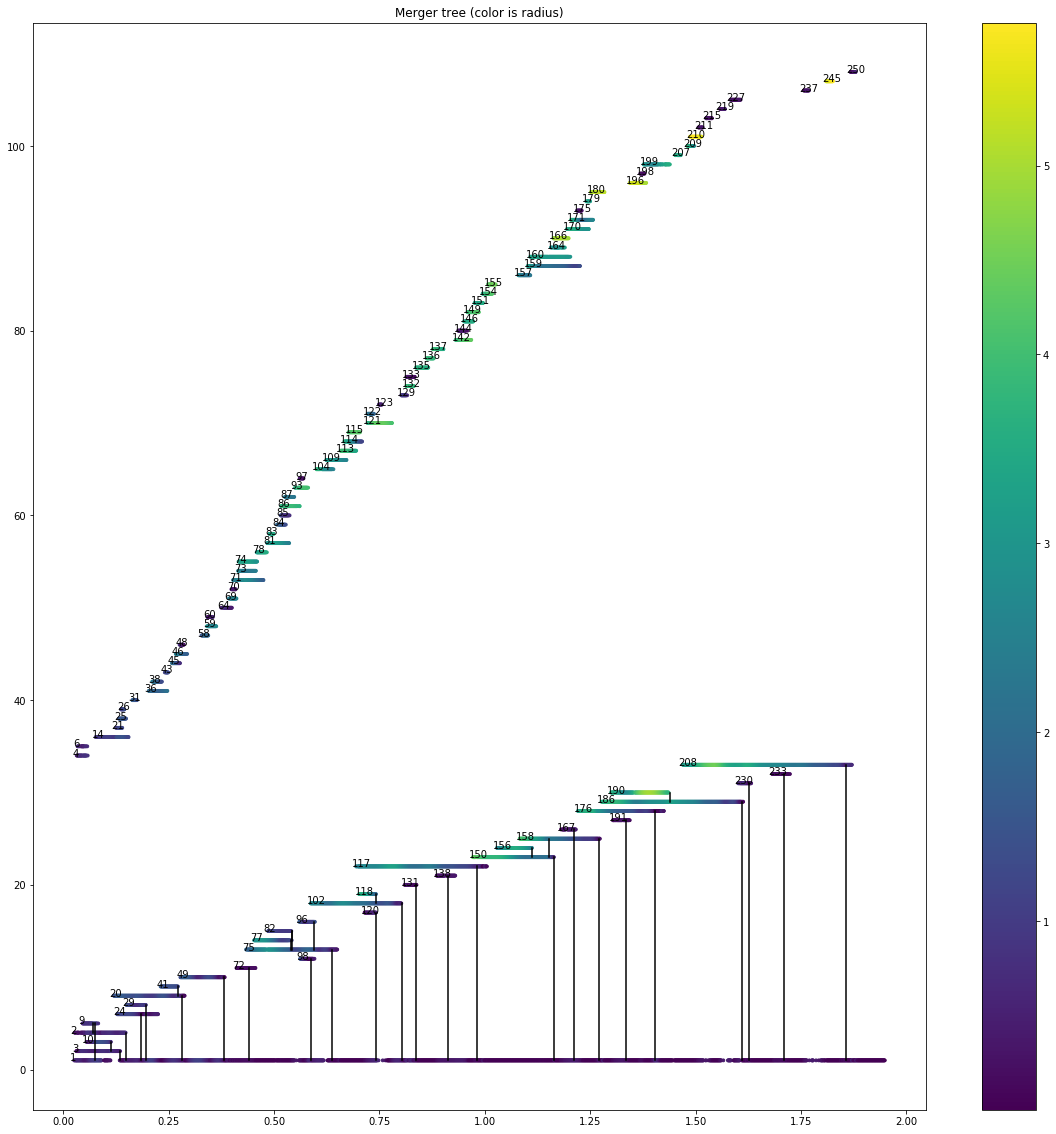

In [5]:
plt.figure(figsize=(20,20))
for i in idlist:
    clump = txy[(txy['ID']==i)]
    plt.text(clump['TIME'][0]-0.01,clump['ID'][0]-0.05,str(clump['CLUMPID'][0]))
plt.scatter(txy['TIME'],txy['ID'],c=(txy['X']**2+txy['Y']**2)**(1/2),s=8)
plt.colorbar()
for merge in merges:
    merge = list(merge)
    ids = merge[2:2+merge[1]]
    t = [merge[0]]*merge[1]
    plt.plot(t,ids,c='k')
    plt.title('Merger tree (color is radius)')

In [15]:
sim = pb.load('/media/bgarver/Backup Plus/Simulations/run733DiffFB20T1.0.%05d'%1000)

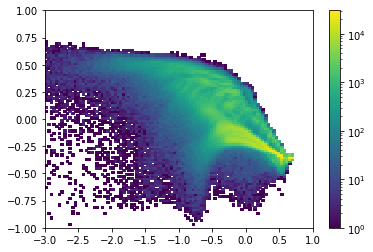

In [54]:
plt.hist2d(sim.s['feh'],sim.s['ofe'],bins=100,range=[[-3,1],[-1,1]],norm=LN())
plt.colorbar()

In [31]:
a = sim.s[[0,2,4]]

In [32]:
a['feh']

SimArray([-25.61069413, -25.61069413, -25.61069413])

In [51]:
tform

SimArray([1.8684625 , 1.8684625 , 1.8684625 , ..., 1.88483125, 1.88483125,
          1.88483125], 'Gyr')